In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [2]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [3]:
matrix = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [4]:
## cria a matriz B
b = matrix.copy()


In [5]:
## substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.
i = np.random.randint(0, b.shape[0])
j = np.random.randint(0, b.shape[1])
while np.isnan(b.iloc[i, j]):
    i = np.random.randint(0, b.shape[0])
    j = np.random.randint(0, b.shape[1])
print(i, j)
print(b.iloc[i, j])
b.iloc[i, j] = np.random.randint(0, 51)/10
print(b.iloc[i, j])

119 2239
3.5
1.8


In [6]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.5)

In [7]:
b = b.to_numpy()

In [8]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [9]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [10]:
print(U.shape)
print(s.shape)
print(Vt.shape)

(671, 671)
(671,)
(9066, 9066)


In [11]:
print(s)

[6.20987374e+03 1.21603176e+02 9.04201574e+01 7.58777187e+01
 6.17950189e+01 5.80987983e+01 5.69130312e+01 5.30366825e+01
 4.99739655e+01 4.87065539e+01 4.76788013e+01 4.62581330e+01
 4.24342814e+01 4.17195429e+01 4.12945905e+01 4.07979879e+01
 3.96757746e+01 3.90199276e+01 3.85586871e+01 3.73783646e+01
 3.69511269e+01 3.63384197e+01 3.50649708e+01 3.46601235e+01
 3.46063766e+01 3.43558760e+01 3.38678055e+01 3.35819700e+01
 3.33118982e+01 3.31370382e+01 3.28302803e+01 3.26896273e+01
 3.23551205e+01 3.22086245e+01 3.18182085e+01 3.16620474e+01
 3.13225240e+01 3.12823466e+01 3.07677781e+01 3.06793365e+01
 3.04663304e+01 3.01213044e+01 2.99164953e+01 2.96849926e+01
 2.96094465e+01 2.95370812e+01 2.93933394e+01 2.93314876e+01
 2.90321615e+01 2.88338668e+01 2.86981632e+01 2.84577875e+01
 2.82736079e+01 2.80569064e+01 2.79969610e+01 2.77941325e+01
 2.76793396e+01 2.72979596e+01 2.71862492e+01 2.71557774e+01
 2.70938730e+01 2.69764707e+01 2.68053397e+01 2.66676939e+01
 2.64074601e+01 2.630880

In [12]:
import matplotlib.pyplot as plt


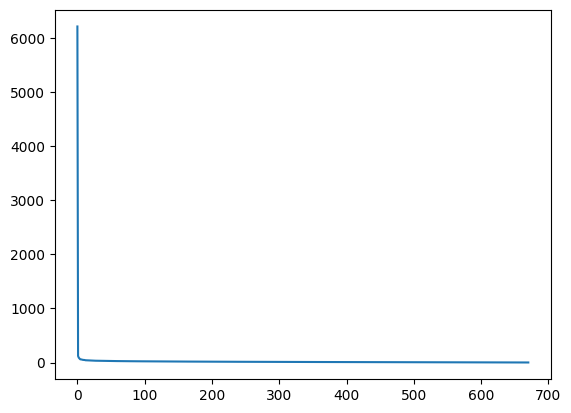

In [13]:
plt.plot(s)
plt.show()

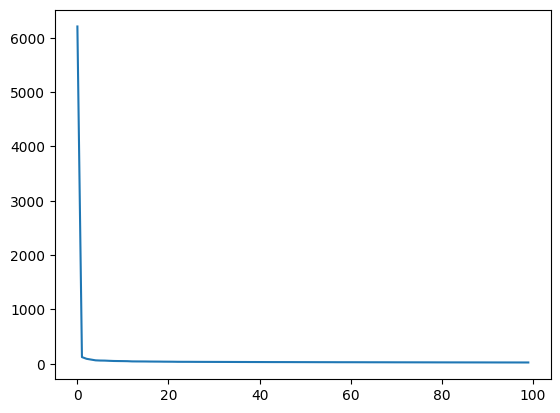

In [14]:
plt.plot(s[:100])
plt.show()

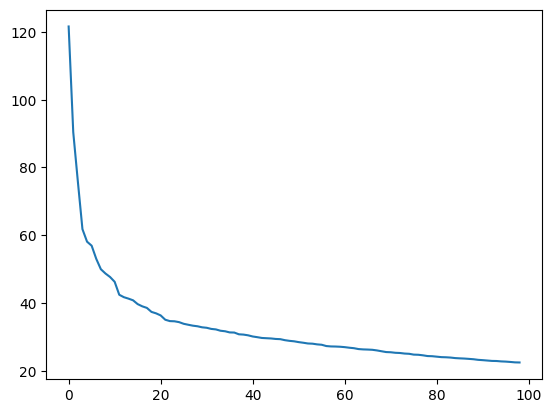

In [15]:
## plot the s values
plt.plot(s[1:100])
plt.show()

In [16]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 60)

In [17]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
print(matrix.iloc[i, j])
print(b[i, j])
print(B_[i, j])


3.5
1.8
2.7675635541787327
